In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
!pip install matplotlib.dates
import matplotlib.dates as mdates


ERROR: Could not find a version that satisfies the requirement matplotlib.dates (from versions: none)
ERROR: No matching distribution found for matplotlib.dates


In [ ]:
df = pd.read_csv("/content/long_data_.csv")
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [ ]:
df.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'Dates'})
df['Dates'] = pd.to_datetime(df['Dates'],format="%d/%m/%Y %H:%M:%S")
df['Dates'] = pd.to_datetime(df['Dates']).dt.date

In [ ]:
df.tail()

,States,Regions,latitude,longitude,Dates,Usage
16594,Manipur,NER,24.799971,93.950017,2020-12-05,2.5
16595,Meghalaya,NER,25.570492,91.880014,2020-12-05,5.8
16596,Mizoram,NER,23.710399,92.720015,2020-12-05,1.6
16597,Nagaland,NER,25.666998,94.116570,2020-12-05,2.1
16598,Tripura,NER,23.835404,91.279999,2020-12-05,3.3


In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['weekday'] = df['Dates'].dt.weekday
df['hour'] = df['Dates'].dt.hour
df['minute'] = df['Dates'].dt.minute

In [ ]:
num_lags = 12
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['Usage'].shift(i)

In [ ]:
window_size = 7
df['rolling_mean'] = df['Usage'].rolling(window=window_size).mean()
df['rolling_std'] = df['Usage'].rolling(window=window_size).std()


In [ ]:
df = pd.get_dummies(df, columns=['States'], prefix='state')

In [ ]:
df.head()

,Regions,latitude,longitude,Dates,Usage,year,month,day,weekday,hour,...,state_Pondy,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_UP,state_Uttarakhand,state_West Bengal
0,NR,31.519974,75.980003,2019-01-02,119.9,2019,1,2,2,0,...,False,True,False,False,False,False,False,False,False,False
1,NR,28.450006,77.019991,2019-01-02,130.3,2019,1,2,2,0,...,False,False,False,False,False,False,False,False,False,False
2,NR,26.449999,74.639981,2019-01-02,234.1,2019,1,2,2,0,...,False,False,True,False,False,False,False,False,False,False
3,NR,28.669993,77.230004,2019-01-02,85.8,2019,1,2,2,0,...,False,False,False,False,False,False,False,False,False,False
4,NR,27.599981,78.050006,2019-01-02,313.9,2019,1,2,2,0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [ ]:
model = SARIMAX(train_data['Usage'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

In [ ]:
predictions = results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

print("MAE:", mean_absolute_error(test_data['Usage'], predictions))
print("MSE:", mean_squared_error(test_data['Usage'], predictions))
print("RMSE:", np.sqrt(mean_squared_error(test_data['Usage'], predictions)))

MAE: 93.2107669713043
MSE: 12992.800251274939
RMSE: 113.98596515042955


In [ ]:
test_data.index = pd.to_datetime(test_data.index)

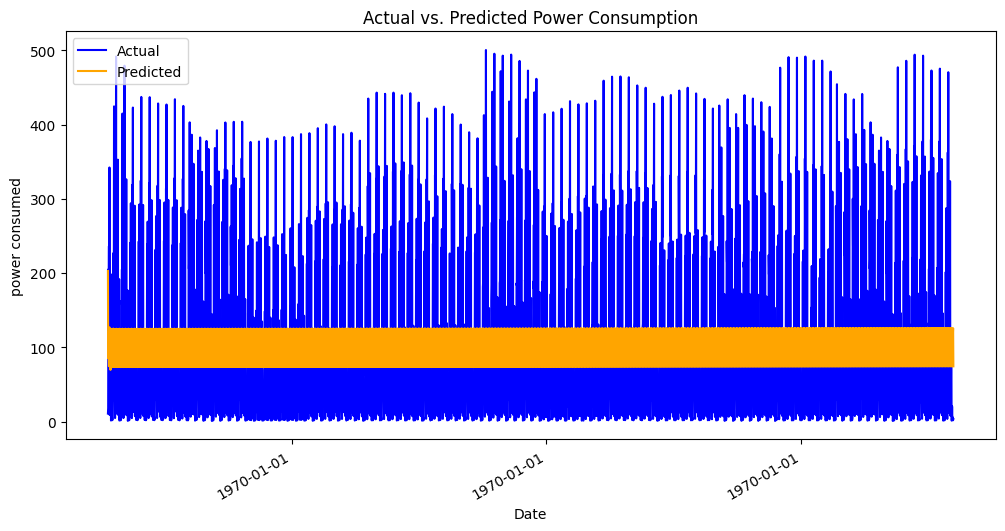

In [ ]:
# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Usage'], label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Power Consumption')
plt.xlabel('Date')
plt.ylabel('power consumed')
plt.legend()

date_formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gcf().autofmt_xdate()
plt.show()


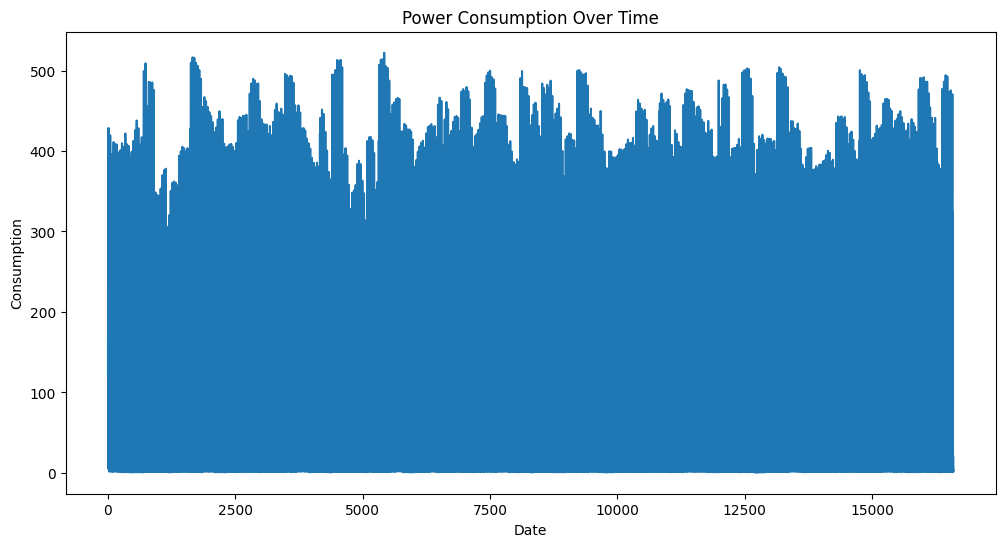

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
df['Usage'].plot(figsize=(12, 6))
plt.title('Power Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

In [ ]:
print(df.isnull().sum())
df = df.interpolate()
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
model = ARIMA(train['Usage'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

Regions                     0
latitude                    0
longitude                   0
Dates                       0
Usage                       0
year                        0
month                       0
day                         0
weekday                     0
hour                        0
minute                      0
lag_1                       1
lag_2                       2
lag_3                       3
lag_4                       4
lag_5                       5
lag_6                       6
lag_7                       7
lag_8                       8
lag_9                       9
lag_10                     10
lag_11                     11
lag_12                     12
rolling_mean                6
rolling_std                 6
state_Andhra Pradesh        0
state_Arunachal Pradesh     0
state_Assam                 0
state_Bihar                 0
state_Chandigarh            0
state_Chhattisgarh          0
state_DNH                   0
state_Delhi                 0
state_Goa 

In [ ]:
forecast = model_fit.forecast(steps=len(test))

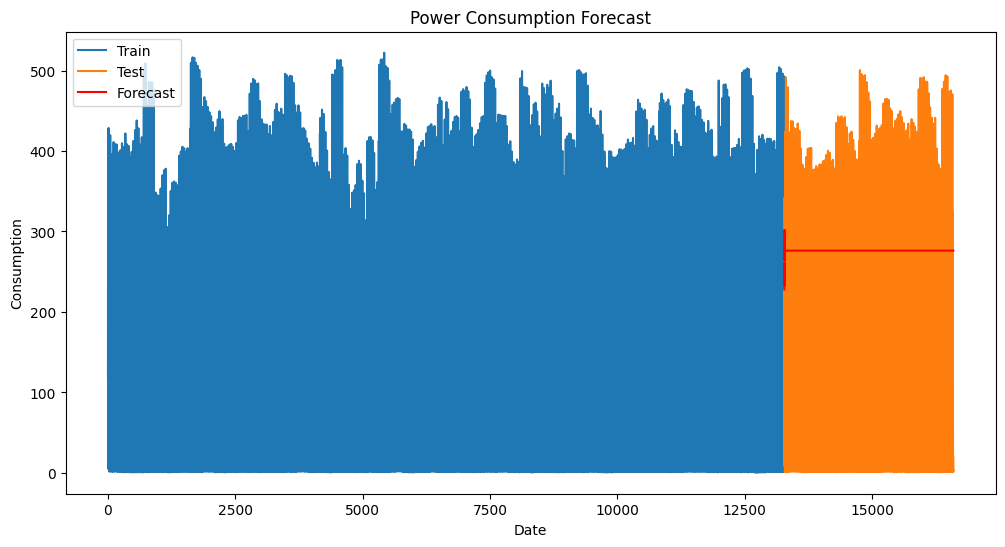

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Usage'], label='Train')
plt.plot(test.index, test['Usage'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Power Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()